In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
from sqlalchemy import  inspect

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date.between('2010-01-01', '2011-01-01')).\
    order_by(Measurement.date.desc()).all()


In [16]:
prcp_results = session.query( Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2010-01-01', '2011-01-01')).\
    order_by(Measurement.date.desc()).all()

In [17]:
one_year = dt.date(2011, 1, 1) - dt.timedelta(days=365)
print(one_year)

2010-01-01


In [18]:
prcp_results[:10]

[('2011-01-01', 0.0),
 ('2011-01-01', 0.42),
 ('2011-01-01', 0.14),
 ('2011-01-01', 0.03),
 ('2011-01-01', 0.38),
 ('2011-01-01', 0.0),
 ('2011-01-01', 0.07),
 ('2010-12-31', 0.0),
 ('2010-12-31', 0.05),
 ('2010-12-31', 0.0)]

In [19]:
df = pd.DataFrame(results, columns=['id', 'station', 'date','prcp', 'tobs'])
#df.set_index('date', inplace=True, )
df.head(10)

,id,station,date,prcp,tobs
0,331,USC00519397,2011-01-01,0.00,69.0
1,3087,USC00513117,2011-01-01,0.42,69.0
2,5722,USC00514830,2011-01-01,0.14,75.0
3,9881,USC00519523,2011-01-01,0.03,69.0
4,12552,USC00519281,2011-01-01,0.38,77.0
5,15313,USC00511918,2011-01-01,0.00,72.0
6,17289,USC00516128,2011-01-01,0.07,74.0
7,330,USC00519397,2010-12-31,0.00,72.0
8,3086,USC00513117,2010-12-31,0.05,74.0
9,5721,USC00514830,2010-12-31,0.00,75.0


In [20]:
date_prcp = df[['date','prcp']]
date_prcp.set_index('date', inplace=True, )
date_prcp.head(10)

,prcp
date,
2011-01-01,0.00
2011-01-01,0.42
2011-01-01,0.14
2011-01-01,0.03
2011-01-01,0.38
2011-01-01,0.00
2011-01-01,0.07
2010-12-31,0.00
2010-12-31,0.05


In [21]:
#df_two= pd.DataFrame(prcp_results, columns=['date','prcp'])
#df.set_index('date', inplace=True, )
#df_two.head(10)

# Exploratory Climate Analysis

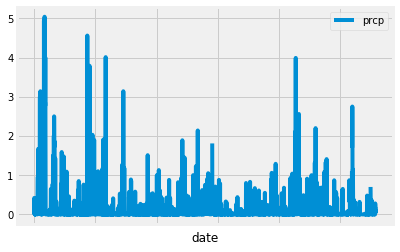

<Figure size 432x288 with 0 Axes>

In [22]:
date_prcp.plot()
#date_prcp.set_xticklabels(date_prcp["date"])
plt.show()
plt.tight_layout()


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp.describe(include='all')


,prcp
count,2688.000000
mean,0.138549
std,0.411545
min,0.000000
25%,0.000000
50%,0.010000
75%,0.090000
max,5.040000


In [24]:

#number is total statusions 
stations = session.query(Measurement).group_by(Measurement.station).count()
print("total stations: ", stations)

total stations:  9


In [25]:
# going thew each cell and giveing me the min max and count of the tobs 
active_test = [Measurement.station, 
           func.min(Measurement.tobs), 
           func.max(Measurement.tobs), 
           func.avg(Measurement.prcp), 
           func.count(Measurement.prcp)]
test = session.query(*active_test).\
      group_by(Measurement.station).\
      order_by(Measurement.station).all()
test


[('USC00511918', 53.0, 87.0, 0.04797101449275366, 1932),
 ('USC00513117', 59.0, 85.0, 0.14192136498516264, 2696),
 ('USC00514830', 58.0, 85.0, 0.12105833763551899, 1937),
 ('USC00516128', 58.0, 84.0, 0.4299879227053122, 2484),
 ('USC00517948', 58.0, 87.0, 0.06360175695461204, 683),
 ('USC00518838', 58.0, 83.0, 0.20722222222222236, 342),
 ('USC00519281', 54.0, 85.0, 0.2123520923520915, 2772),
 ('USC00519397', 56.0, 87.0, 0.0490204841713224, 2685),
 ('USC00519523', 56.0, 85.0, 0.11496111975116619, 2572)]

In [26]:
# data frame with max, min from the cell above in to a data frame 
df_test = pd.DataFrame(test, columns=['station','temp min', 'temp max','prcp avg','prcp count'])
df_test.set_index('station', inplace=True, )
df_test.head()

,temp min,temp max,prcp avg,prcp count
station,,,,
USC00511918,53.0,87.0,0.047971,1932
USC00513117,59.0,85.0,0.141921,2696
USC00514830,58.0,85.0,0.121058,1937
USC00516128,58.0,84.0,0.429988,2484
USC00517948,58.0,87.0,0.063602,683


In [27]:
#this was my atempt at trying to do what I did in the sell below did not work

#start_date = "2011-02-28"
#end_date = "2012-02-28"
#calc_temps = session.query(Measurement.station, func.count(Measurement.tobs)), func.min(Measurement.tobs), func.max(Measurement.tobs)).\
       # filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


#temp = calc_temps[0][0]
# function usage example
#print(calc_temps)
#for station  in calc_temps :
    #print ("station min temp: ", station )
    

In [28]:
#this list the station with the most reports . and will list them in desending order .

calc_temps = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
   order_by(func.count(Measurement.tobs).desc()).all() 

station_temp = calc_temps[0][0]

print("busiset station is: ",station_temp,"total",calc_temps[0][1])
for station ,count in calc_temps:
    print("station:",station,"total",count)

busiset station is:  USC00519281 total 2772
station: USC00519281 total 2772
station: USC00519397 total 2724
station: USC00513117 total 2709
station: USC00519523 total 2669
station: USC00516128 total 2612
station: USC00514830 total 2202
station: USC00511918 total 1979
station: USC00517948 total 1372
station: USC00518838 total 511


In [29]:
temp =  session.query( Measurement.station, Measurement.date,  Measurement.tobs).\
    filter(Measurement.station == station_temp).\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()

In [30]:
temp_df=pd.DataFrame(temp)
temp_df.head()


,station,date,tobs
0,USC00519281,2010-01-02,62.0
1,USC00519281,2010-01-03,74.0
2,USC00519281,2010-01-04,75.0
3,USC00519281,2010-01-05,74.0
4,USC00519281,2010-01-06,76.0


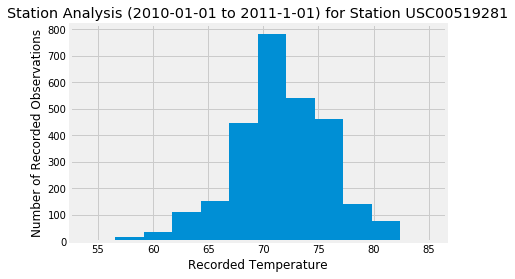

In [31]:
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (2010-01-01 to 2011-1-01) for Station " + station_temp)
plt.show()

## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
from flask import Flask, jsonify

In [34]:
def trip(start):
   
    start_date= dt.datetime.strptime(start, '%Y-%m-%d')
    last_year = dt.timedelta(days=365)
    start = start_date-last_year
    

In [35]:
one_year = dt.date(2011, 1, 1) - dt.timedelta(days=365)

In [36]:
print(one_year)

2010-01-01
